# Infant Mortality Analysis and Prediction

## Background

### Problem

The infant mortality rate is the number of infant deaths under one year old per 1,000 live births. Infant mortality rate provides us not only the health measures of infant and maternal health, but also the over all health of a certain region. 

In our case, we gathered data related to general health of all 3141 counties in United States from [healthdata.gov](https://healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer). This includes nine different datasets containing over 200 health related measurements. We used MySQL to study the attributes of all datasets and create a dataset containing useful information which can be used for analyzing and predicting infant mortality rates. 

While we were performing the initial analysis of the infant mortality dataset using Python, we realized that about 9% of all the United States counties are missing the infant mortality values. We will build machine learning models to see if we can predict the infant mortality rates for those counties based on other attributes information.
 

### Objectives 

* Analyze the factors that have effects on infant mortality rates.
* Develop a machine learning model to predict the unknown infant mortality rates. 

### Dataset Information

* The infant mortality dataset was generated from CHSI(Community Health Status Indicators) report, which contains over 200 measures for each of the 3,141 United States counties.
* Attributes include:
     * ID, County Name, State Name
     * LBW: Low Birth Weight(3 pounds 5 ounces)
     * VLBW: Very Low Birth Weight(2 pounds 3 ounces)
     * Premature: Premature births(less than 37 weeks)
     * Under_18: Birth was given by women under 18 years old.
     * Over_40: Birth was given by women over 40 years old.
     * Unmarried: Birth was given by unmarried women.
     * Late_Care: No care in first trimester during the pregnancy.

## Initial Exploration and Pre-processing

**Import the libraries**

In [307]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

**Check the structure and datatype**

In [286]:
Birth_IM = pd.read_csv('Birth_IM.csv')
Birth_IM.head()

,id,CHSI_County_Name,CHSI_State_Name,LBW,VLBW,Premature,Under_18,Over_40,Unmarried,Late_Care,Infant_Mortality
0,1,Autauga,Alabama,8.1,1.6,14.3,5.1,1.4,28.0,12.9,5.9
1,2,Baldwin,Alabama,8.6,1.9,15.3,4.3,1.9,25.4,15.3,7.1
2,3,Barbour,Alabama,11.0,1.9,16.7,7.7,1.1,50.2,26.0,7.1
3,4,Bibb,Alabama,8.7,1.7,13.7,6.5,0.9,30.2,16.3,9.8
4,5,Blount,Alabama,7.6,1.5,12.8,5.0,1.3,19.3,16.7,9.0


In [205]:
Birth_IM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 11 columns):
id                  3141 non-null int64
CHSI_County_Name    3141 non-null object
CHSI_State_Name     3141 non-null object
LBW                 3141 non-null float64
VLBW                3141 non-null float64
Premature           3141 non-null float64
Under_18            3141 non-null float64
Over_40             3141 non-null float64
Unmarried           3141 non-null float64
Late_Care           3141 non-null float64
Infant_Mortality    3141 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 270.0+ KB


**Check outliers and missing values**

In [51]:
Birth_IM.describe()

,id,LBW,VLBW,Premature,Under_18,Over_40,Unmarried,Late_Care,Infant_Mortality
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,1571.000000,-3.824992,-75.128208,5.445782,-23.668609,-44.669214,29.164343,-59.234129,-88.734607
std,906.872924,115.815180,282.959840,89.329406,178.062926,224.274166,65.065976,407.310441,314.837792
min,1.000000,-2222.200000,-2222.200000,-2222.200000,-2222.200000,-2222.200000,-2222.200000,-2222.200000,-2222.200000
25%,786.000000,6.300000,1.000000,10.200000,2.900000,1.100000,24.600000,12.600000,5.000000
50%,1571.000000,7.300000,1.300000,11.700000,4.300000,1.500000,30.400000,16.500000,6.700000
75%,2356.000000,8.600000,1.600000,13.200000,6.000000,2.100000,38.200000,21.200000,8.700000
max,3141.000000,15.600000,3.600000,23.500000,14.500000,9.100000,77.900000,53.500000,23.700000


Here, we use describe() function to check various statstics of the dataset. We know that all the measures are in percentage(besides ID), minimum value of -2222.2 is impossible, it could stand for unreported values. 

We will convert entries with value of -2222.2 to NAN, which stands for missing values, so we can work on them later. 

In [287]:
# change -2222.2 to NAN
Birth_IM = Birth_IM.replace(-2222.2, np.nan)
Birth_IM.describe()

,id,LBW,VLBW,Premature,Under_18,Over_40,Unmarried,Late_Care,Infant_Mortality
count,3141.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3034.000000,3140.000000
mean,1571.000000,-3.118503,-74.444427,6.155223,-22.968439,-43.975732,29.881338,17.047132,-88.055159
std,906.872924,108.853907,280.397425,80.005587,173.712929,220.916017,51.182853,29.760102,312.576249
min,1.000000,-1111.100000,-1111.100000,-1111.100000,-1111.100000,-1111.100000,-1111.100000,-1111.100000,-1111.100000
25%,786.000000,6.300000,1.000000,10.200000,2.900000,1.100000,24.600000,13.000000,5.000000
50%,1571.000000,7.300000,1.300000,11.700000,4.300000,1.500000,30.400000,16.800000,6.700000
75%,2356.000000,8.600000,1.600000,13.200000,6.000000,2.100000,38.200000,21.400000,8.700000
max,3141.000000,15.600000,3.600000,23.500000,14.500000,9.100000,77.900000,53.500000,23.700000


Now, the minimum values of all atrributes become -1111.1, we will convert those values to NAN also. 

In [288]:
# convert -1111.1 to NAN
Birth_IM = Birth_IM.replace(-1111.1, np.nan)
Birth_IM.describe()

,id,LBW,VLBW,Premature,Under_18,Over_40,Unmarried,Late_Care,Infant_Mortality
count,3141.000000,3110.000000,2926.000000,3124.000000,3062.000000,3011.000000,3134.000000,3032.000000,2872.000000
mean,1571.000000,7.569421,1.373855,11.877401,4.750131,1.742976,32.065731,17.791293,7.410028
std,906.872924,1.846797,0.499596,2.398650,2.291837,0.914043,11.259706,6.774566,2.888455
min,1.000000,2.100000,0.200000,5.100000,0.300000,0.200000,6.100000,2.000000,0.000000
25%,786.000000,6.300000,1.000000,10.200000,3.000000,1.100000,24.700000,13.000000,5.500000
50%,1571.000000,7.400000,1.300000,11.700000,4.400000,1.500000,30.500000,16.800000,7.000000
75%,2356.000000,8.600000,1.600000,13.200000,6.000000,2.100000,38.200000,21.400000,8.900000
max,3141.000000,15.600000,3.600000,23.500000,14.500000,9.100000,77.900000,53.500000,23.700000


Now, all statstic numbers looks normal and we have convert all missing values to the correct format. 

**Rename attributes**

In [289]:
# rename attributes
Birth_IM = Birth_IM.rename(columns={'id':'ID','CHSI_County_Name':'County_Name', 'CHSI_State_Name':'State_Name',
                                   'MOBD_Time_Span':'Time_Span'})
# check all columns names
Birth_IM.columns

Index(['ID', 'County_Name', 'State_Name', 'LBW', 'VLBW', 'Premature',
       'Under_18', 'Over_40', 'Unmarried', 'Late_Care', 'Infant_Mortality'],
      dtype='object')

**Work on missing values**

* Count missing values for each attributes.

In [290]:
Birth_IM.isnull().sum()

ID                    0
County_Name           0
State_Name            0
LBW                  31
VLBW                215
Premature            17
Under_18             79
Over_40             130
Unmarried             7
Late_Care           109
Infant_Mortality    269
dtype: int64

* Split the dataset into two 

Here is when we realized that 269 counties among all 3141 counties don't have reported infant mortality rates. We split the dataset into two subsets. One with known infant mortality rates is for developing a machine learning model. The other one with unkonwn infant mortality rates is for make the prediction. 

In [291]:
# create a dataset with known infant mortality rates
IM = Birth_IM[Birth_IM.Infant_Mortality.notnull()]
IM.head()

,ID,County_Name,State_Name,LBW,VLBW,Premature,Under_18,Over_40,Unmarried,Late_Care,Infant_Mortality
0,1,Autauga,Alabama,8.1,1.6,14.3,5.1,1.4,28.0,12.9,5.9
1,2,Baldwin,Alabama,8.6,1.9,15.3,4.3,1.9,25.4,15.3,7.1
2,3,Barbour,Alabama,11.0,1.9,16.7,7.7,1.1,50.2,26.0,7.1
3,4,Bibb,Alabama,8.7,1.7,13.7,6.5,0.9,30.2,16.3,9.8
4,5,Blount,Alabama,7.6,1.5,12.8,5.0,1.3,19.3,16.7,9.0


In [292]:
# create a dataset with unknown infant mortality rates
IM_missing = Birth_IM[Birth_IM.Infant_Mortality.isnull()]
IM_missing.head()

,ID,County_Name,State_Name,LBW,VLBW,Premature,Under_18,Over_40,Unmarried,Late_Care,Infant_Mortality
67,68,Aleutians East,Alaska,3.6,NaN,9.9,3.6,NaN,47.3,17.7,NaN
68,69,Aleutians West,Alaska,5.0,NaN,8.2,2.2,2.9,28.2,18.9,NaN
71,72,Bristol Bay,Alaska,NaN,NaN,7.5,3.8,4.3,28.5,12.6,NaN
72,73,Denali,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,30.4,NaN
75,76,Haines,Alaska,5.6,NaN,8.2,2.5,4.5,29.3,24.9,NaN


* Check the ramaining missing value for the IM dataset with known infant mortality values.

In [293]:
IM.isnull().sum()

ID                    0
County_Name           0
State_Name            0
LBW                   0
VLBW                  4
Premature             0
Under_18              0
Over_40               5
Unmarried             0
Late_Care           102
Infant_Mortality      0
dtype: int64

* Use mean values to replace the remaining missing values.

In [294]:
IM.fillna(IM.mean(), inplace=True)
IM.isnull().sum()

/Users/snowli/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


ID                  0
County_Name         0
State_Name          0
LBW                 0
VLBW                0
Premature           0
Under_18            0
Over_40             0
Unmarried           0
Late_Care           0
Infant_Mortality    0
dtype: int64

**Create a final dataset for machine learning**

We drop 'ID', 'County_Name' and 'State_Name' columns since it doesn't contain useful information for the prediction. 

In [295]:
# create final dataset 
IM_final = IM.drop(['ID','County_Name', 'State_Name'], axis=1)
IM_final.head()

,LBW,VLBW,Premature,Under_18,Over_40,Unmarried,Late_Care,Infant_Mortality
0,8.1,1.6,14.3,5.1,1.4,28.0,12.9,5.9
1,8.6,1.9,15.3,4.3,1.9,25.4,15.3,7.1
2,11.0,1.9,16.7,7.7,1.1,50.2,26.0,7.1
3,8.7,1.7,13.7,6.5,0.9,30.2,16.3,9.8
4,7.6,1.5,12.8,5.0,1.3,19.3,16.7,9.0


## Factor Analysis

### Correlation

Correlation is a measure of the relationship between two or more features or variables. We were tasked with investigating if some specific factors impact on infant mortality rates more in this problem, we can create a correlation matrix to achieve this.

**Create heatmap for correlation**

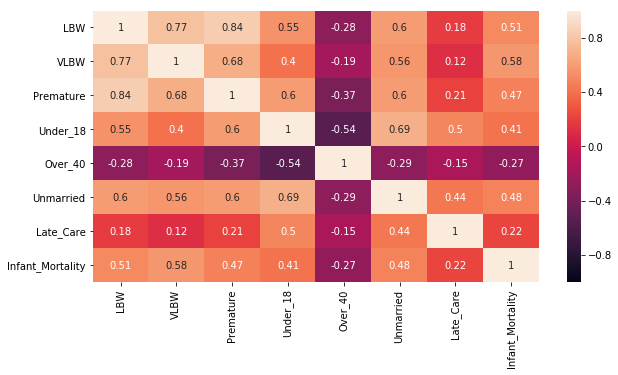

In [233]:
# create correlation matrix
corr = IM_final.corr()

# plot the heatmap for correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

**Create a barchart to see factor impact**

In [235]:
# create a dataframe showing the correlation between infant mortality and different features/factors.
corr_IM = corr.loc['LBW':'Late_Care', ['Infant_Mortality']]
measures = [ 'LBW', 'VLBW', 'Premature', 'Under_18', 'Over_40',
                    'Unmarried', 'Late_Care']
corr_IM['Measures'] = measures
corr_IM


,Infant_Mortality,Measures
LBW,0.513373,LBW
VLBW,0.577343,VLBW
Premature,0.474642,Premature
Under_18,0.407109,Under_18
Over_40,-0.268136,Over_40
Unmarried,0.480946,Unmarried
Late_Care,0.224827,Late_Care


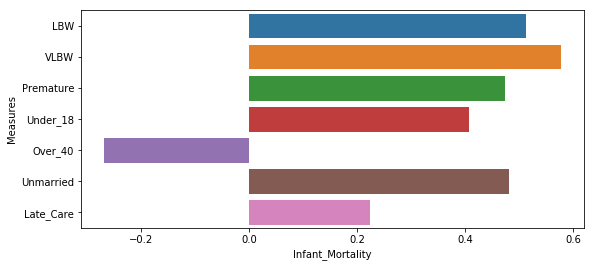

In [236]:
# Plot the barchart
plt.figure(figsize=(9,4))
sns.barplot(data=corr_IM, x='Infant_Mortality', y='Measures')

From the barchart we can tell, VLBW(very low birth weight) has the highest impact on infant mortality rate. Late_Care doesn't have a huge impact on the rate. Which is interesting is births by women over 40 has a slight negative impact on infant mortality. 

## Develop the Models

### Random Forest

Random Forest algorithms is under the tree model family. Tree model is a flowchart-like structure that works by splitting the sample based on the maximum informative vaiable, named nodes. Each nodes will then split again, the process repeats until the subsamples cannot be split any further.

Random Forest works by constructing multiple decision trees and output the average. The advantage of Random forests is avoiding overfitting from simple decision tree model.

### SVM

SVM (Support Vector Machine) works by assigning examples to one category or the other. Given known training examples, the algorithm builds an optimal hyperplane which categorizes new examples. The advantage of SVM is it builds non-linear hyperpane which is able to classifiy higher dimensional problems.

### Gradient Boosting

Gradient Boosting and example of one of the ensemble method, boosting. Unlike Random Forest which take the average of multiple decisions, Boosting trains the predictors sequentially. It works by learning mistakes from the previous predictors, the process iterates to reduce the error untill it finds the optimal one. 

### Cross Validation

Cross-validation is a resampling procedure. It splits a given data sample into numbers of groups. Each group is called a fold, total k(any number) folds. It chose a training set of the size of one fold, train our model on that partition, all the folds will be examined. Then it evaluate the results on the remaining test data. The final results/scores are averaged out. This could avoid overfitting problem.

**Import related libraries**

In [275]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import preprocessing

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

**Define training and testing sets**

In [296]:
features = IM_final.iloc[:, 0:7]
depVar = IM_model['Infant_Mortality']
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2010, 7), (862, 7), (2010,), (862,))

**Define regressors**

In [334]:
rfRegressor = RandomForestRegressor(n_estimators=50)
gbRegressor = GradientBoostingRegressor(n_estimators=50)
svrRegressor = SVR(kernel='linear', C=3)

**Use cross_val_score to check the performance on three regressors**

* Random Forest

In [328]:
rfScore = cross_val_score(rfRegressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('mean_squared_error of random forest training set: %.3f' % rfScore.mean())

mean_squared_error of random forest training set: -5.268


* Gradient Boosting

In [330]:
gbScore = cross_val_score(gbRegressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('mean_squared_error of gradient boosting training set: %.3f' % gbScore.mean())

mean_squared_error of gradient boosting training set: -5.073


* Support Vector Machine

In [335]:
svrScore = cross_val_score(svrRegressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('mean_squared_error of support vector machine training set: %.3f' % svrScore.mean())

mean_squared_error of support vector machine training set: -4.988


**Fit the model**

Even thought SVR has the best score, it took significantly longer time to train compairing to Gradient Boosting. At the same time, Gradient Boosting model has a very close score with SVR. Here we will use Gradient Boosting regressor to fit the model. 

In [337]:
# fit the model
gbModel = gbRegressor.fit(X_train, y_train)

# testing the model
gbPred = gbModel.predict(X_test)
gbR2 = r2_score(y_test, gbPred)
gbRMSE = mean_squared_error(y_test, gbPred)
print('Test R Squared: %.3f' % gbR2)
print('Test MSE: %.3f' % gbRMSE)

Test R Squared: 0.359
Test MSE: 5.608


Mean squared error from training and testing sets are close, our model is consistent.

## Conclusion 

### Factors effect infant mortality rates

* VLBW(very low birth weight) has the highest impact on infant mortality rate. 
* Late_Care doesn't have a huge impact on the rate. 
* Births by women over 40 has a slight negative impact on infant mortality.

### Can we make predictions on the missing mortality rates?

The optimal model we achieved doesn't have pleasant scores. This is due to few reasons:

* Too little factors. There are not enough factors, especially factors that have higher correlation with the infant mortality rates.
* Too many missing values. The counties which are missing infant mortality rates also have many missing values for other factors, the model doesn't have enough information to make the predictions. 

### What we can do?

* Gather and study more factors which may help to predict the infant mortality rates.
* Racial and ethnic factors play a crucial role for United States infant mortality, we can take this into consideration. 

**This is the end of the project**